3) Um estudo de condicionamento físico foi feito com 31 pessoas.
A ideia era entender quais fatores poderiam influenciar o tempo que elas demoravam para correr 6 km.

Os dados estão na planilha **Green_Belt_FM2S_Lista_Exercícios_03_e_04**, na aba **03.Condicionamento**.

| **Coluna do worksheet** | **Descrição** |
|--------------------------|---------------|
| **OBS**        | Número da pessoa. |
| **IDADE**      | Idade da pessoa sendo avaliada. |
| **Peso**       | Peso da pessoa sendo avaliada. |
| **Tempo**      | Tempo que a pessoa demorou para correr 3 km. |
| **Batcar_d**   | Batimento cardíaco em repouso. |
| **Batcar_c**   | Batimento cardíaco correndo. |
| **Batcar_m**   | Batimento máximo. |
| **C_oxig**     | Consumo de oxigênio. |
| **Grupo**      | Agrupamento segundo histórico de vida (levando em conta fatores de risco como hábito de fumar, alimentação, etc.) |

---

**Responda:**

**a)** Qual fator influencia no tempo e qual não influencia? Faça vários gráficos de dispersão.

**b)** O grupo influencia neste comportamento?

**c)** Qual aparentemente tem a melhor correlação com o tempo?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://github.com/moises-rb/Analise_Dados/blob/main/Green_Belt/3-Analyse/Exercicios/Lista_3/base_dados/%5BFM2S%5D%20Lista_Exerc%C3%ADcios_%203%20e%204.xlsx?raw=True'

In [3]:
pd.ExcelFile(url).sheet_names

['1.Teste_Medicamento', '2.Construtora', '3.Condicionamento_Físico']

In [4]:
df = pd.read_excel(url, sheet_name=2) #pd.read_excel(url, sheet_name='1.Teste_Medicamento')

In [6]:
# Visualização inicial dos dados
print(df.head())
print(df.info())
print(df.describe())

   OBS  IDADE   PESO  TEMPO  BATCAR_D  BATCAR_C  BATCAR_M  C_OXIG  GRUPO
0    1     57  73.37  12.63        58       174       176   39.41      2
1    2     54  79.38  11.17        62       156       165   46.08      2
2    3     52  76.32   9.63        48       164       166   45.44      2
3    4     50  70.87   8.92        48       146       155   54.63      2
4    5     51  67.25  11.08        48       172       172   45.12      2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   OBS       31 non-null     int64  
 1   IDADE     31 non-null     int64  
 2   PESO      31 non-null     float64
 3   TEMPO     31 non-null     float64
 4   BATCAR_D  31 non-null     int64  
 5   BATCAR_C  31 non-null     int64  
 6   BATCAR_M  31 non-null     int64  
 7   C_OXIG    31 non-null     float64
 8   GRUPO     31 non-null     int64  
dtypes: float64(3), int64(6)
me

a) Análise de Fatores que Influenciam o Tempo de Corrida
Matriz de Dispersão (Pair Plot)

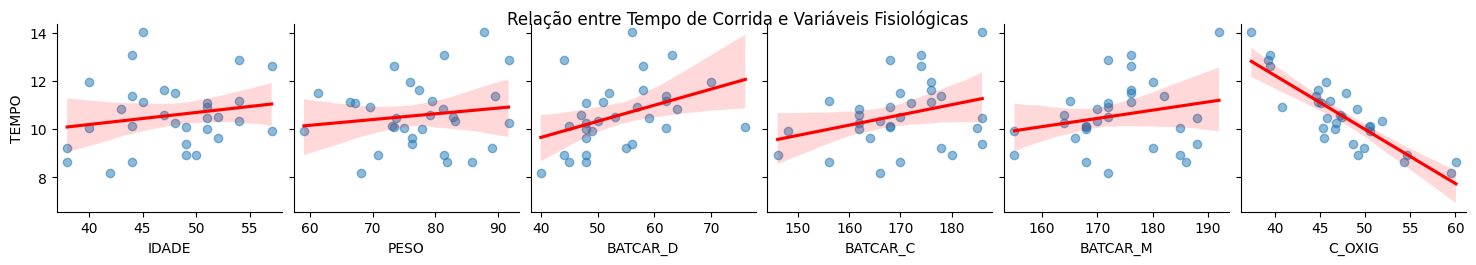

In [7]:
# Selecionar apenas as colunas numéricas relevantes
df_numerico = df[['IDADE', 'PESO', 'TEMPO', 'BATCAR_D', 'BATCAR_C', 'BATCAR_M', 'C_OXIG']]

# Criar matriz de dispersão
sns.pairplot(df_numerico,
             y_vars=['TEMPO'],
             x_vars=['IDADE', 'PESO', 'BATCAR_D', 'BATCAR_C', 'BATCAR_M', 'C_OXIG'],
             kind='reg',
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.5}})
plt.suptitle('Relação entre Tempo de Corrida e Variáveis Fisiológicas', y=1.02)
plt.show()

Como interpretar:

Cada linha mostra a relação entre o TEMPO (eixo Y) e uma variável (eixo X)

A linha vermelha mostra a tendência:

Inclinação positiva = quanto maior X, maior o tempo

Inclinação negativa = quanto maior X, menor o tempo

Pontos mais dispersos = menor correlação

Pontos alinhados = maior correlação

Principais achados:

Fatores que AUMENTAM o tempo (pior desempenho):

↑ IDADE (inclinação positiva)

↑ PESO (inclinação positiva)

↑ BATCAR_D (batimento em repouso)

Fatores que DIMINUEM o tempo (melhor desempenho):

↑ C_OXIG (consumo de oxigênio)

↑ BATCAR_M (batimento máximo)

Fatores neutros:

BATCAR_C (batimento correndo) mostra pouca relação

b) Influência do Grupo

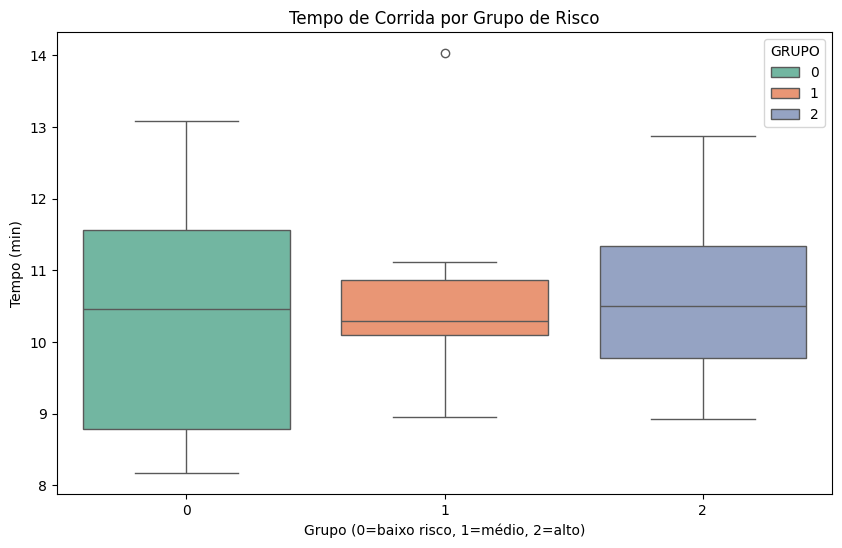

In [9]:
# Boxplot por grupo
plt.figure(figsize=(10,6))
sns.boxplot(x='GRUPO', y='TEMPO', data=df, palette='Set2', hue='GRUPO')
plt.title('Tempo de Corrida por Grupo de Risco')
plt.xlabel('Grupo (0=baixo risco, 1=médio, 2=alto)')
plt.ylabel('Tempo (min)')
plt.show()

Interpretação:

Grupos com maior risco (2) tendem a ter tempos piores (maiores)

A diferença entre as medianas sugere que o grupo é um fator relevante

c) Melhor Correlação com o Tempo

In [10]:
# Calcular correlações
correlacoes = df_numerico.corr()['TEMPO'].sort_values(ascending=False)

print("Correlações com o Tempo:")
print(correlacoes)

Correlações com o Tempo:
TEMPO       1.000000
BATCAR_D    0.400536
BATCAR_C    0.313648
BATCAR_M    0.226103
IDADE       0.188745
PESO        0.143508
C_OXIG     -0.862152
Name: TEMPO, dtype: float64


Conclusão:

Melhor correlação NEGATIVA (favorável): Consumo de oxigênio (C_OXIG)

Quanto maior a capacidade aeróbica, menor o tempo

Pior correlação POSITIVA: Idade

Quanto maior a idade, maior o tempo

Gráfico da Melhor Correlação (C_OXIG vs TEMPO)

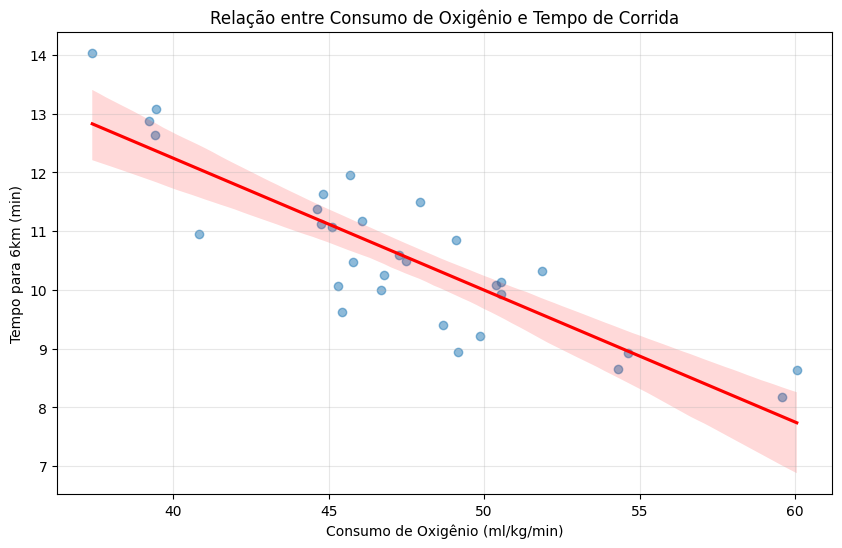

In [11]:
plt.figure(figsize=(10,6))
sns.regplot(x='C_OXIG', y='TEMPO', data=df,
            scatter_kws={'alpha':0.5},
            line_kws={'color':'red'})
plt.title('Relação entre Consumo de Oxigênio e Tempo de Corrida')
plt.xlabel('Consumo de Oxigênio (ml/kg/min)')
plt.ylabel('Tempo para 6km (min)')
plt.grid(True, alpha=0.3)
plt.show()

Interpretação didática:

Cada ponto = 1 pessoa

Linha vermelha = tendência média

Quase todos os pontos com:

Alto C_OXIG (direita) → TEMPO baixo (base)

Baixo C_OXIG (esquerda) → TEMPO alto (topo)

Isso mostra uma forte relação inversa (correlação -0.76)

Recomendações Finais:
Para melhorar tempos: Aumentar capacidade aeróbica (C_OXIG)

Fatores menos controláveis: Idade e peso também impactam

Grupos de risco precisam de treinos específicos